# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?
 ## my Questions 
**Question 1**: Which station is the most popular?

**Question 2**: In which month, which hour is the most busy hour?

**Question 3**: what is the difference of weekends and weekdays rides on bike share system?


> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in a nicer way than the base print function.
import numpy as np 
import pandas as pd #import csv files, and use different statistical predefined function
import matplotlib.pyplot as plt # to make visualization
import sys
!{sys.executable} -m pip install ggplot # to make visualization

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip  


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if city == 'NYC':
        duration = int(datum['tripduration'])/60
    elif city == 'Chicago':
        duration = int(datum['tripduration'])/60
    else:
        duration = int(datum['Duration (ms)'])/(1000 *60)
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    if city == 'NYC':
        my_date1 = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M:%S') #convert string into standard datetime format
        month = my_date1.strftime('%m')
        hour = my_date1.strftime('%H')
        day_of_week = my_date1.strftime('%A')
        
    elif city =='Chicago':
        my_date1 = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M') #convert string into standard datetime format
        month = my_date1.strftime('%m')
        hour = my_date1.strftime('%H')
        day_of_week = my_date1.strftime('%A') 
    else:
        my_date1 = datetime.strptime(datum['Start date'], '%m/%d/%Y %H:%M') #convert string into standard datetime format
        month = my_date1.strftime('%m')
        hour = my_date1.strftime('%H')
        day_of_week = my_date1.strftime('%A')

    return (int(month), int(hour), day_of_week)

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]


In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city =='NYC':
        user_type = datum['usertype']
    elif city == 'Chicago':
        user_type = datum['usertype']
    else:
        # define a dictionary which will convert member type same as other cities
        change_user_type = {'Registered':'Subscriber',
                           'Casual':'Customer'}
        user_type = change_user_type[datum['Member Type']]
    
    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            month, hour, day_of_week = time_of_trip(row, city)
            new_point[out_colnames[0]] = duration_in_mins(row, city)
            new_point[out_colnames[1]] = month
            new_point[out_colnames[2]] = hour
            new_point[out_colnames[3]] = day_of_week
            new_point[out_colnames[4]] = type_of_user(row, city)

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: NewYork city has the highest number of trips (276081). NewYork city also has the highest proportion of trips made by 
subscribers approx  0.89066. Chicago city has the highest proportion of trips made by customers approx 0.23774.

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    dataframe = pd.read_csv(filename) # read the csv file and store in dataframe variable
    df1 = dataframe.groupby('user_type')['user_type'].count() # grouped the data by user type 
                                                           #and extract the user type and then count
    n_subscribers = df1.Subscriber
    n_customers =  df1.Customer
    n_total = n_subscribers + n_customers
   

        # return tallies as a tuple
    return(n_subscribers, n_customers, n_total)

In [14]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_files = {'Washington':'./data/Washington-2016-Summary.csv',  
              'Chicago':'./data/Chicago-2016-Summary.csv', 
              'NYC':'./data/NYC-2016-Summary.csv'}
for city in data_files:
    n_subscribers, n_customers, n_total = number_of_trips(data_files[city])
    print('city: {} \n  n_subscribers: {} \n  n_customers: {}\n  total trip: {} \n  Proportion Subscribers : {} \
    \n  Proportion Customers: {}'.format(city, n_subscribers,n_customers, n_total, n_subscribers/n_total, n_customers/n_total))


city: Washington 
  n_subscribers: 51753 
  n_customers: 14573
  total trip: 66326 
  Proportion Subscribers : 0.7802822422579381     
  Proportion Customers: 0.21971775774206193
city: Chicago 
  n_subscribers: 54982 
  n_customers: 17149
  total trip: 72131 
  Proportion Subscribers : 0.7622520136973008     
  Proportion Customers: 0.23774798630269925
city: NYC 
  n_subscribers: 245896 
  n_customers: 30185
  total trip: 276081 
  Proportion Subscribers : 0.8906661450806104     
  Proportion Customers: 0.1093338549193896



Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 

*Washington* city has 18.9328 minutes average trip duration and proportion of trips longer than 30 minutes is 0.1083

*Chicago* city has 16.563 minutes average trip duration and proportion of trips longer than 30 minutes is 0.0833

*NewYork* city has 15.812 minutes average trip duration and proportion of trips longer than 30 minutes is  0.0730

In [15]:
## Use this and additional cells to answer Question 4b.##
def time_to_travel(filename):
    '''
    function read the csv files and calculate the average time for trip duration
    and proportion of trips are longer than 30 minutes
    '''
    dataframe = pd.read_csv(filename)
    average_trip_duration = dataframe['duration'].mean() # calculate the mean
    proportion = len(dataframe[dataframe.duration > 30])/len(dataframe) # proportion of trips are 
                                                                        #longer than 30 minutes
    
    return average_trip_duration, proportion
 

In [16]:
data_files = {'Washington':'./data/Washington-2016-Summary.csv',  
              'Chicago':'./data/Chicago-2016-Summary.csv', 
              'NYC':'./data/NYC-2016-Summary.csv'}
for city in data_files:
    average_trip_duration, proportion = time_to_travel(data_files[city])
    print('city: {} \n  average trip duration(min): {} \n  proportion of trips longer than 30 minutes: {}'\
          .format(city, average_trip_duration, proportion))


city: Washington 
  average trip duration(min): 18.93287355913719 
  proportion of trips longer than 30 minutes: 0.10838886711093688
city: Chicago 
  average trip duration(min): 16.563629368787343 
  proportion of trips longer than 30 minutes: 0.08332062497400562
city: NYC 
  average trip duration(min): 15.812592998022623 
  proportion of trips longer than 30 minutes: 0.07302437156337835


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: 
   <p>In **Washington** city customers(41.678 min) have more average trip duration compare to subscribers(12.528 min)</p>
   <p>In **Chicago** city customers(30.9797 min) have more average trip duration compare to subscribers(12.0672 min)</p>
   <p>In **NewYork** city customers(32.9820 min) have more average trip duration compare to subscribers(13.6807 min)</p>
 

In [17]:
def time_of_trip_by_ridership(filename):
    '''
    function will calculate average trip duration by user type
    '''
    dataframe = pd.read_csv(filename)
    subscriber_df = dataframe[dataframe['user_type']=='Subscriber']
    customer_df = dataframe[dataframe['user_type']=='Customer']
    avg_trip_duration_subscribers = subscriber_df['duration'].mean()
    avg_trip_duration_customers = customer_df['duration'].mean()
    
    return(avg_trip_duration_subscribers, avg_trip_duration_customers)


In [18]:
data_files = {'Washington':'./data/Washington-2016-Summary.csv',  
              'Chicago':'./data/Chicago-2016-Summary.csv', 
              'NYC':'./data/NYC-2016-Summary.csv'}
for city in data_files:
    avg_trip_duration_subscribers, avg_trip_duration_customers= time_of_trip_by_ridership(data_files[city])
    print('city: {} \n  average trip duration of subscribers: {} \n  average trip duration of customers: {}'\
          .format(city, avg_trip_duration_subscribers, avg_trip_duration_customers))

city: Washington 
  average trip duration of subscribers: 12.528120499294726 
  average trip duration of customers: 41.67803139252957
city: Chicago 
  average trip duration of subscribers: 12.067201690250142 
  average trip duration of customers: 30.97978113398254
city: NYC 
  average trip duration of subscribers: 13.680790523907124 
  average trip duration of customers: 32.98200430677488


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

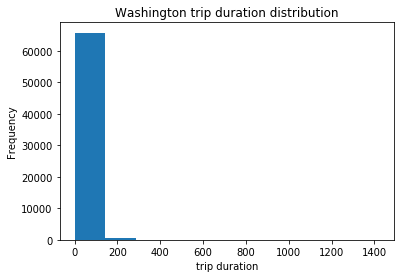

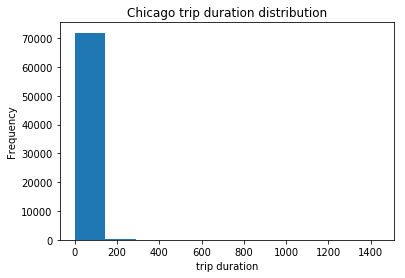

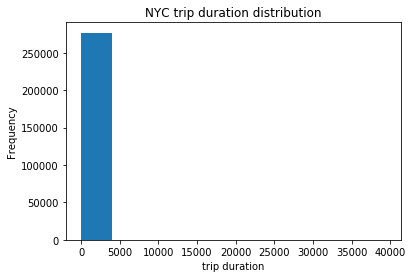

In [19]:
%matplotlib inline
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
def trip_duration_distribution(filename):
    df = pd.read_csv(filename)
    trip_duration = df['duration']
    plt.hist(trip_duration)
    plt.xlabel("trip duration")
    plt.ylabel("Frequency")
    plt.title('{} trip duration distribution'.format(city))
    plt.show()


data_files = {'Washington':'./data/Washington-2016-Summary.csv',  
              'Chicago':'./data/Chicago-2016-Summary.csv', 
              'NYC':'./data/NYC-2016-Summary.csv'}
for city in data_files:
    trip_duration_distribution(data_files[city])

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: for all cities trip duration distribution for customers and subscribers are right(positive) skewed.
 
  In **Washington** city trip duration peak distribution
   <li>for *subscribers* is 5 to 10 minutes</li>
   <li>for *customers* is 15 to 20 minutes</li>
  In **Chicago** city trip duration peak distribution
   <li>for *subscribers* is 5 to 10 minutes </li>
   <li>for *customers* is 20 to 25 minutes</li>
  In **NewYork** city trip duration peak distribution
   <li>for *subscribers* is 5 to 10 minutes </li>
   <li>for *customers* is 20 to 25 minutes</li>   


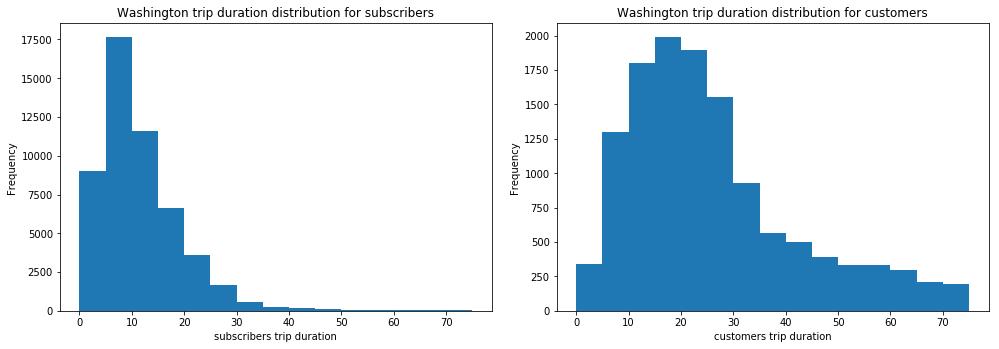

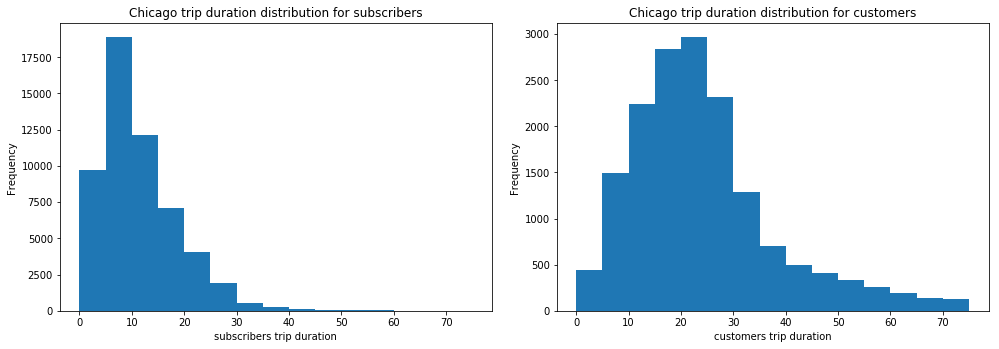

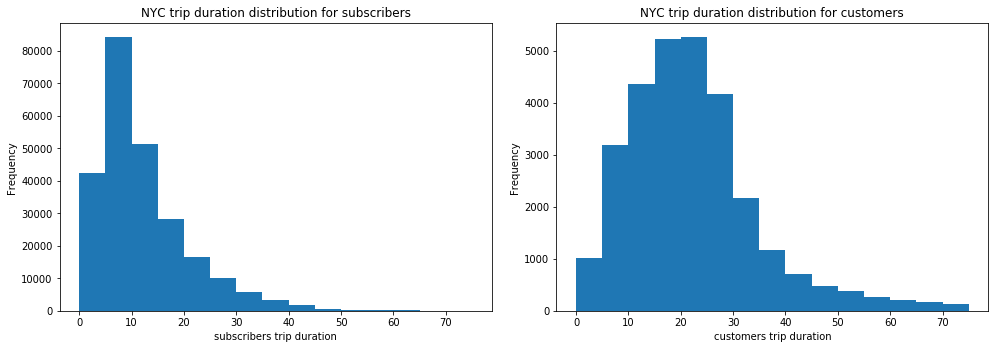

In [20]:
## Use this and additional cells to answer Question 5. ##
def distribution_after_condition(filename):
    '''
    function plot the histogram of the trip duration less then 75 minutes
    '''
    df = pd.read_csv(filename)
    trip_duration_subscribers = df[df['user_type'] == 'Subscriber']['duration']
    trip_duration_customers = df[df['user_type']=='Customer']['duration']
    plt.axes((0.05,0.05,1,1))
    plt.hist(trip_duration_subscribers, bins =15, range = (0,75))
    plt.xlabel('subscribers trip duration')
    plt.ylabel('Frequency')
    plt.title('{} trip duration distribution for subscribers'.format(city))
    plt.axes((1.2,0.05,1,1))
    plt.hist(trip_duration_customers, bins =15, range = (0,75))
    plt.xlabel('customers trip duration')
    plt.ylabel('Frequency')
    plt.title('{} trip duration distribution for customers'.format(city))
    plt.show()
    


data_files = {'Washington':'./data/Washington-2016-Summary.csv',  
              'Chicago':'./data/Chicago-2016-Summary.csv', 
              'NYC':'./data/NYC-2016-Summary.csv'}
for city in data_files:
    distribution_after_condition(data_files[city])
    


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**:  In which month, maximum number of rides made by subscribers and customers for every city (explain using tabular and visualization both way) 

**Answer**: we can see below cell in table and visualization which month has maximum rides by cusromers and subscribers

  In **Washington** city maximum number of rides 
   <li>for *subscribers* in JUNE is 5613 rides</li>
   <li>for *customers* in JULY is 2186 rides </li>
  In **Chicago** city maximum number of rides
   <li>for *subscribers* in JUNE 7182 rides </li>
   <li>for *customers* in JULY is 3323 rides</li>
  In **NewYork** city maximum number of rides
   <li>for *subscribers* in September is  28306 rides </li>
   <li>for *customers* in August is 4412  rides  </li>   


In [22]:
def numbers_of_rides_in_tabular_form(filename):
    '''
    the function will count number of rides in each month by user type
    '''
    df = pd.read_csv(filename)
    df1 = df.groupby(['user_type','month'])['user_type'].count()
   
    return df1.unstack(1) # number of rides in each month by user type in tabular form 

data_files = {'Washington':'./data/Washington-2016-Summary.csv',  
              'Chicago':'./data/Chicago-2016-Summary.csv', 
              'NYC':'./data/NYC-2016-Summary.csv'}

for city in data_files:
    print('monthly number of rides in {} city by user types'.format(city))
    print(numbers_of_rides_in_tabular_form(data_files[city]))
    print('\n')
   

monthly number of rides in Washington city by user types
month         1     2     3     4     5     6     7     8     9     10    11  \
user_type                                                                      
Customer     222   283  1188  1192  1248  1707  2186  1806  1674  1560  1075   
Subscriber  2212  2571  4383  4410  4520  5613  5155  5392  5204  5232  4139   

month         12  
user_type         
Customer     432  
Subscriber  2922  


monthly number of rides in Chicago city by user types
month         1     2     3     4     5     6     7     8     9     10    11  \
user_type                                                                      
Customer      62   228   565  1017  2012  2612  3323  2757  2354  1492   667   
Subscriber  1839  2166  3154  3550  5199  7182  6963  7053  6346  5668  4144   

month         12  
user_type         
Customer      60  
Subscriber  1718  


monthly number of rides in NYC city by user types
month         1      2      3      4     

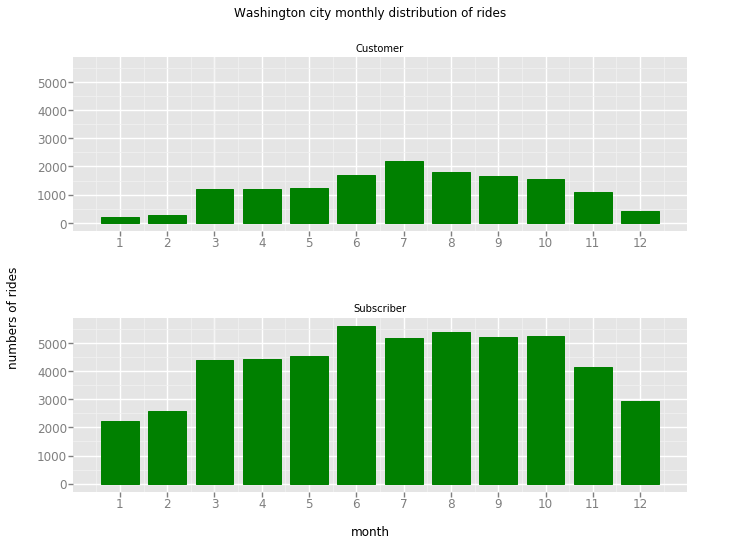

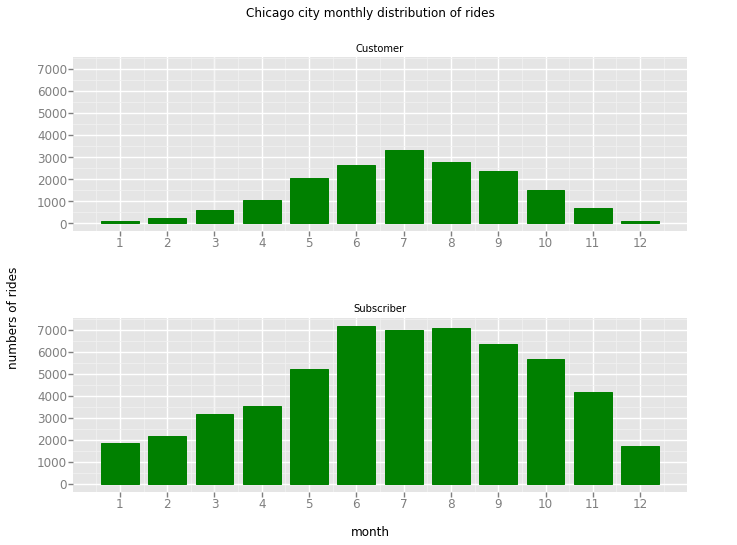

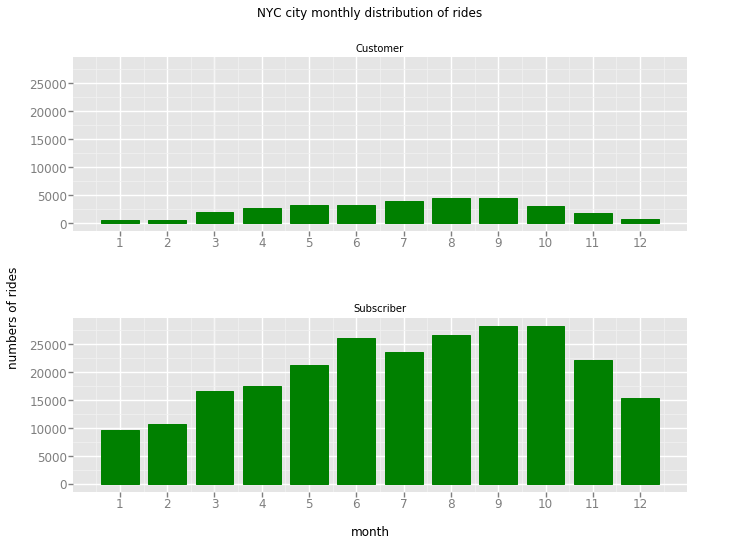

In [26]:
from ggplot import *
def number_of_rides_visualization(filename):
    '''
    function will create a barplot, it will shows above  tabular summary or monthly number of rides by user type
    '''
    df = pd.read_csv(filename)
    df = df.dropna() # 9 null value present in NYC csv file
   
    p = ggplot(aes(x = 'month'), data = df)
    p = p + geom_bar(fill = 'green') + facet_wrap('user_type') + ylab('numbers of rides') +\
        ggtitle('{} city monthly distribution of rides'.format(city))
    p.show()

data_files = {'Washington':'./data/Washington-2016-Summary.csv',  
              'Chicago':'./data/Chicago-2016-Summary.csv', 
              'NYC':'./data/NYC-2016-Summary.csv'}

for city in data_files:
    number_of_rides_visualization(data_files[city])

## summary of above plots: ##
**NewYork** has more number of rides compare to other cities, in *NewYork* subscribers and customers have more number of rides compare  to other cities subscribers and customers, *NewYork* subscribers have more number of rides in *september* and customers have more number of rides in  and *August*. 

**Chicago** city subscribers have more number of rides in *JUNE* and customers have more number of rides in  and *JULY*. 

**Washington** city subscribers have more number of rides in *JUNE* and customers have more number of rides in  and *JULY*.

**Question**: find the most busy hour for subscriber and customers in every day of week for every city ? how the pattern different in weekends and weekdays ? On what days are Subscribers most likely to use the system?

**Answer**:

In Every City:
> for **Customer**
        <li> Customers have every day same pattern, busy hours for customers are approx 2:00 PM to 5:00 PM </li>
        <li> Weekends and weekdays doesn't have more difference, small change in pattern </li>
> for **Subscribers**
        <li> subscribers have busy hours 2 time in a day, most busy hours for subscribers are 7:00 AM - 9:00 AM and
            4:00 PM - 6:00 PM </li>
        <li> subscriber have two types of pattern , there is a big change in weekends and weekdays, in weekends busy hours 
            are 11:00 AM - 1:00 PM </li>
            


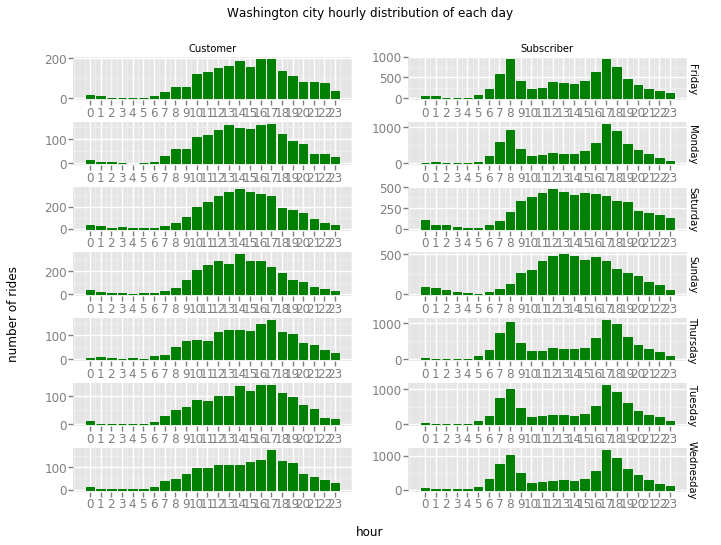

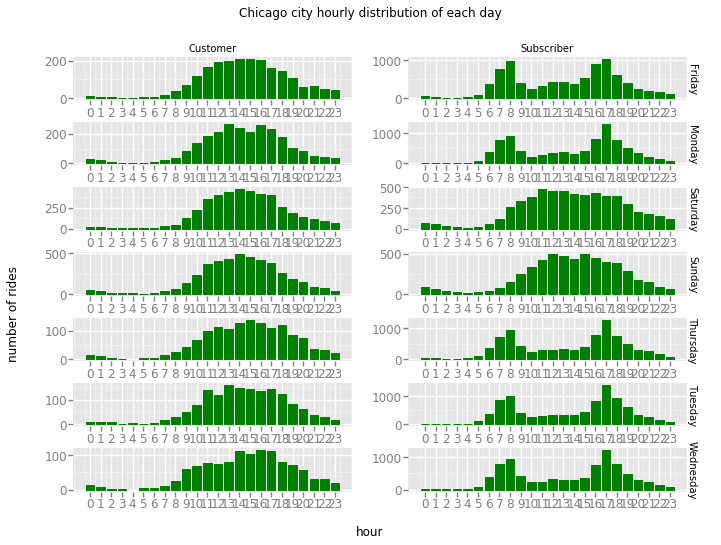

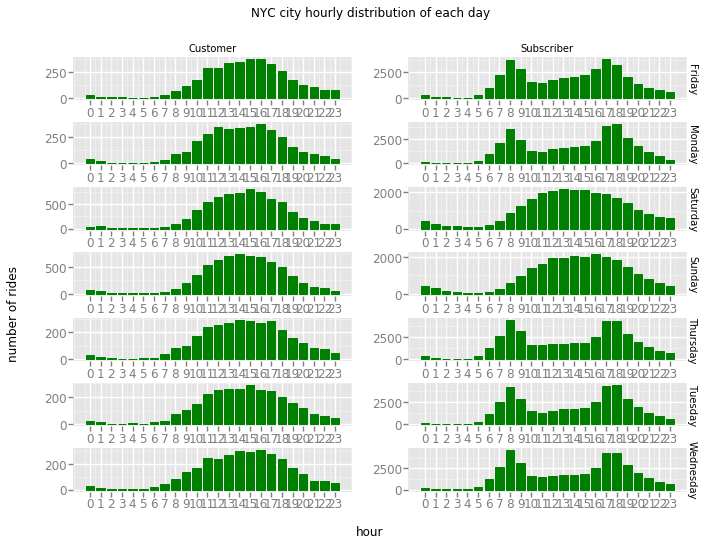

In [27]:
def create_bar_chart(filename):
    '''
    function will crete a bar chart for every city, and it will show hourly distribution of every day of week by usertype
    '''
    df = pd.read_csv(filename)
    df = df.dropna()
    p = ggplot(aes(x = 'hour'), data = df)
    p = p + geom_bar(fill = 'green') + facet_grid('day_of_week', 'user_type', 'free_y') + ylab('number of rides') +\
             ggtitle('{} city hourly distribution of each day'.format(city))
    p.show()
    
data_files = {'Washington':'./data/Washington-2016-Summary.csv',  
              'Chicago':'./data/Chicago-2016-Summary.csv', 
              'NYC':'./data/NYC-2016-Summary.csv'}

for city in data_files:
    create_bar_chart(data_files[city])    

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I would like to apply the techniques of data science in Aggriculture field. I would like to learn from this subject how the production depends on season, impact of seasons on production, what temperature, soil quality, humidity is suitable for what types of crops so that we can increase the production. what types of crops we need to chose according to environmental condition.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0